### Import necessary libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
data_company = pd.read_csv('Company_Data.csv')
data_company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Data Understanding 

In [3]:
data_company.shape

(400, 11)

In [4]:
data_company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data_company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

### Model Building

In [6]:
data_company1 = pd.get_dummies(data_company,columns=['Urban','US'], drop_first=True)

In [7]:
data_company1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
5,10.81,124,113,13,501,72,Bad,78,16,0,1
6,6.63,115,105,0,45,108,Medium,71,15,1,0
7,11.85,136,81,15,425,120,Good,67,10,1,1
8,6.54,132,110,0,108,124,Medium,76,10,0,0
9,4.69,132,113,0,131,124,Medium,76,17,0,1


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_company1['ShelveLoc'] = le.fit_transform(data_company1['ShelveLoc'])

In [12]:
data_company1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
5,10.81,124,113,13,501,72,0,78,16,0,1
6,6.63,115,105,0,45,108,2,71,15,1,0
7,11.85,136,81,15,425,120,1,67,10,1,1
8,6.54,132,110,0,108,124,2,76,10,0,0
9,4.69,132,113,0,131,124,2,76,17,0,1


In [13]:
data_company1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban_Yes        uint8
US_Yes           uint8
dtype: object

In [14]:
X = data_company1.drop(labels='ShelveLoc',axis=1)
y= data_company1[['ShelveLoc']]

In [15]:
X

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [16]:
y

,ShelveLoc
0,0
1,1
2,2
3,2
4,0
...,...
395,1
396,2
397,2
398,0


In [17]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
data_company1.norm = norm_func(data_company1.iloc[:,1:])
data_company1.norm.tail(10)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
390,0.316327,0.545455,0.310345,0.102204,0.520958,1.0,0.763636,0.250,1.0,1.0
391,0.775510,0.424242,0.000000,0.078156,0.598802,0.0,0.563636,0.750,1.0,0.0
392,0.530612,0.212121,0.448276,0.611222,0.634731,0.0,0.163636,0.375,1.0,1.0
393,0.326531,0.303030,0.344828,0.032064,0.574850,1.0,0.090909,0.875,0.0,1.0
394,0.540816,0.373737,0.655172,0.713427,0.688623,0.0,0.145455,0.750,1.0,1.0
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.5,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,1.0,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,1.0,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.0,0.454545,0.250,1.0,1.0
399,0.581633,0.161616,0.000000,0.034068,0.574850,0.5,0.436364,0.750,1.0,1.0


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train.shape,y_train.shape

((320, 10), (320, 1))

In [21]:
X_test.shape,y_test.shape

((80, 10), (80, 1))

### Model Training

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
dt_model.score(X_train,y_train)

1.0

In [24]:
dt_model.score(X_test,y_test)

0.525

### Data Visualization

*When max depth is 3

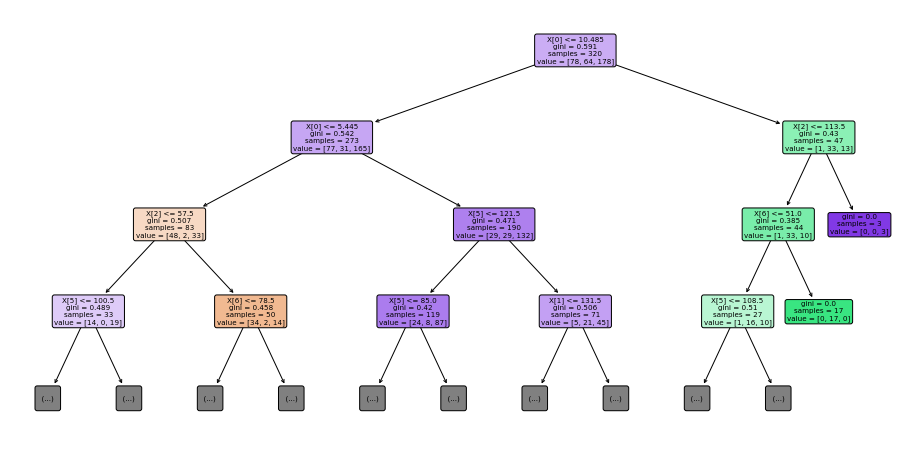

In [40]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(dt_model,filled=True, rounded=True,max_depth=3)
plt.show()

*Without restricting max depth

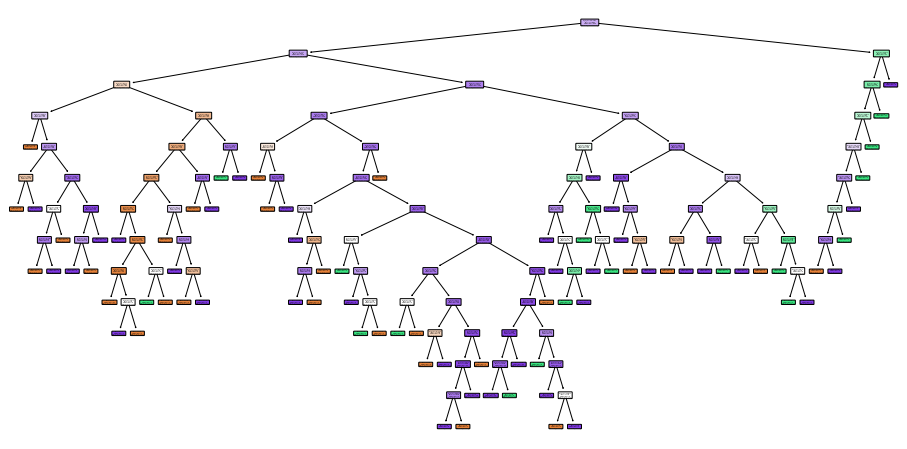

In [42]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

### ModelTesting

In [84]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

### Model Evaluation

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix

##### For training data

In [86]:
accuracy_score(y_train,y_pred_train)

1.0

In [87]:
print(confusion_matrix(y_train,y_pred_train))

[[ 78   0   0]
 [  0  64   0]
 [  0   0 178]]


##### Test data

In [88]:
accuracy_score(y_test,y_pred_test)

0.5375

***As the model accuracy score is 1.0 the model is good**